# Exploring data

## Importación de librerías

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importación de datos

In [7]:
data_train = pd.read_csv("Data/train.csv")
data_test = pd.read_csv("Data/test.csv")

In [8]:
data_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Ideal,F,SI1,61.4,55.0,4.31,4.34,2.65,630.99
1,1,0.41,Ideal,G,SI1,61.6,57.0,4.77,4.81,2.95,701.21
2,2,0.30,Very Good,H,SI1,62.2,60.0,4.24,4.28,2.65,604.26
3,3,1.04,Premium,F,VVS2,62.5,58.0,6.46,6.37,4.01,909.90
4,4,0.84,Fair,G,VS1,55.6,64.0,6.42,6.32,3.54,790.99


In [9]:
data_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.70,Very Good,H,SI1,61.0,58.0,5.67,5.70,3.47
1,1,1.52,Ideal,H,VS2,61.8,54.0,7.42,7.43,4.59
2,2,1.03,Ideal,E,SI1,62.0,57.0,6.44,6.47,4.00
3,3,0.70,Very Good,G,VVS1,63.3,57.0,5.59,5.63,3.55
4,4,1.28,Ideal,H,SI1,62.4,56.0,6.93,6.91,4.32


## Exploración de los datos

In [11]:
data_train.shape

(40455, 11)

In [12]:
data_train.info() #no hay NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [13]:
#valores únicos de los datos categóricos

In [14]:
data_train["color"].value_counts()

G    8421
E    7336
F    7186
H    6220
D    5110
I    4092
J    2090
Name: color, dtype: int64

In [15]:
data_train["clarity"].value_counts()

SI1     9736
VS2     9190
SI2     6933
VS1     6150
VVS2    3811
VVS1    2739
IF      1340
I1       556
Name: clarity, dtype: int64

In [16]:
data_train["cut"].value_counts()

Ideal        16177
Premium      10414
Very Good     9060
Good          3615
Fair          1189
Name: cut, dtype: int64

In [17]:
#correlación de los datos

In [18]:
data_train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.797776,61.747888,57.460082,5.730041,5.732506,3.538057,778.527384
std,11678.496907,0.474994,1.424381,2.220637,1.124438,1.123521,0.710454,101.591895
min,0.000000,0.200000,43.000000,50.000000,0.000000,0.000000,0.000000,578.690000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,685.120000
50%,20227.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,778.160000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,858.530000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,31.800000,31.800000,984.280000


In [19]:
data_train.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,0.001532,0.006526,-0.000698,0.000301,0.000192,0.003344,0.001335
carat,0.001532,1.000000,0.027246,0.183954,0.975503,0.968114,0.949656,0.920809
depth,0.006526,0.027246,1.000000,-0.298994,-0.026661,-0.029465,0.093272,0.000707
table,-0.000698,0.183954,-0.298994,1.000000,0.198397,0.190358,0.152761,0.160367
x,0.000301,0.975503,-0.026661,0.198397,1.000000,0.991240,0.966477,0.958430
y,0.000192,0.968114,-0.029465,0.190358,0.991240,1.000000,0.960666,0.952990
z,0.003344,0.949656,0.093272,0.152761,0.966477,0.960666,1.000000,0.931511
price,0.001335,0.920809,0.000707,0.160367,0.958430,0.952990,0.931511,1.000000


<AxesSubplot:>

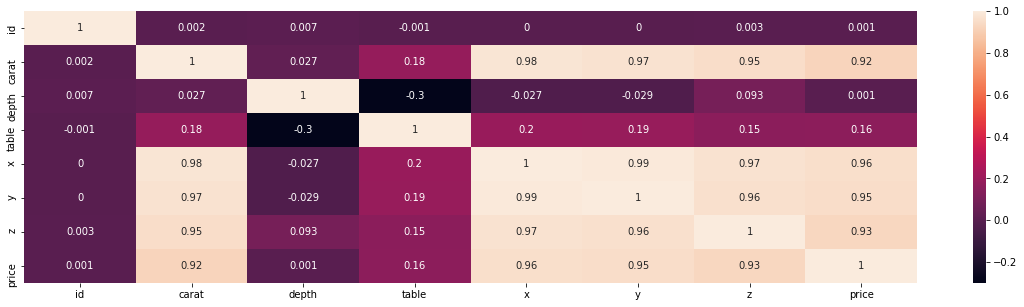

In [22]:
plt.figure(figsize=(20,5))
sns.heatmap(data_train.corr().round(3), annot=True)

In [23]:
#scatter matrix

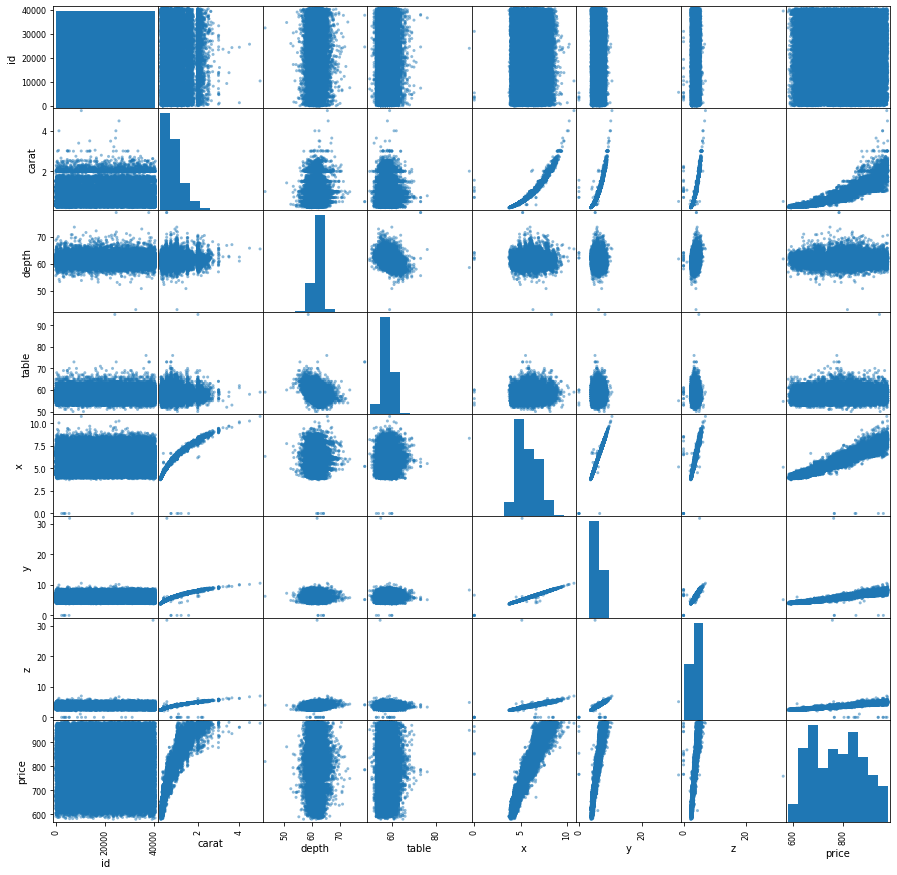

In [25]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(data_train,figsize=(15,15));

In [26]:
#importancia de las variables

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
X=data_train.drop("price", axis=1)

y=data_train.price

In [30]:
x=sm.add_constant(X._get_numeric_data())

modelo=sm.OLS(y, x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 7.201e+04
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:11:59   Log-Likelihood:            -1.9175e+05
No. Observations:               40455   AIC:                         3.835e+05
Df Residuals:                   40447   BIC:                         3.836e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7341      9.552      6.672      0.000      45.011      82.457
id          1.002e-05   1.18e-05      0.850      0.396   -1.31e-05    3.31e-05
carat        -73.5951      1.360    -54.105      0.000     -76.261     -70.929
depth          2.5137      0.116     21.649      0.000       2.286       2.741
table         -0.9688      0.066    -14.578      0.000      -1.099      -0.839
x             98.0084      1.147     85.422      0.000      95.760     100.257
y             16.8206      0.935     17.983      0.000      14.987      18.654
z              4.4488      0.856      5.195      0.000       2.770       6.127
==============================================================================
Omnibus:                    34305.988   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14213800.632
Skew:                           3.104   Prob(JB):                         0.00
Kurtosis:                      94.618   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**OJOO TENEMOS UN BUEN R2 POSIBLE BUENA LINEAR REGRESSION**